In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
# This code is to Load the dataset
data = pd.read_csv('Dataset.csv', encoding='ISO-8859-1')
print(data)  # Print the whole dataset

      Species  Length  Width   l/w  top angle  Length of the petiole
0    Uguressa     7.4    3.7  2.00        110                    0.8
1   Weliwenna     8.2    3.7  2.21         80                    0.9
2      Veralu     7.5    3.9  1.92         80                    1.2
3    Uguressa     8.4    4.8  1.75        145                    0.8
4   Weliwenna     9.2    3.8  2.41         72                    1.0
..        ...     ...    ...   ...        ...                    ...
85     Veralu     7.6    4.2  1.80         78                    2.0
86   Uguressa     7.9    3.6  2.19        145                    0.7
87  Weliwenna     9.1    3.6  2.52         72                    0.9
88  Weliwenna     8.9    3.5  2.54         76                    1.0
89   Uguressa     8.1    4.5  1.80        141                    0.9

[90 rows x 6 columns]


In [3]:
# This code define features and target
features = ['Length', 'Width', 'l/w', 'top angle', 'Length of the petiole']
target = 'Species'

In [4]:
# This code ensure 'top angle' is string, remove degree symbol, and convert to float.This is a recorrection of a mistake happened while making the dataset
data['top angle'] = data['top angle'].astype(str).str.replace('°', '').astype(float)

In [5]:
# This code is to extract features and target variables
X = data[features].values
y = data[target].values

In [6]:
#This code is to encode the target variable
target_label_encoder = LabelEncoder()
y = target_label_encoder.fit_transform(y)
y = to_categorical(y)

In [7]:
# This code is to scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# This code define a function to build the model
def build_model(input_dim, output_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(output_dim, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# This code Uses k-fold cross-validation to evaluate the model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_accuracies = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = build_model(input_dim=X.shape[1], output_dim=y.shape[1])
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    val_accuracy = history.history['val_accuracy'][-1]
    all_accuracies.append(val_accuracy)

average_accuracy = np.mean(all_accuracies)
print(f'Average Validation Accuracy is: {average_accuracy*100:.2f}%')

Average Validation Accuracy is: 100.00%


In [14]:
# With the help of this code we can train the final model.
model = build_model(input_dim=X.shape[1], output_dim=y.shape[1])
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.2934 - loss: 1.1713 - val_accuracy: 0.6111 - val_loss: 1.0108
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5069 - loss: 1.0409 - val_accuracy: 0.9444 - val_loss: 0.8930
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5738 - loss: 0.9728 - val_accuracy: 1.0000 - val_loss: 0.7912
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6593 - loss: 0.8947 - val_accuracy: 1.0000 - val_loss: 0.7039
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8021 - loss: 0.7748 - val_accuracy: 1.0000 - val_loss: 0.6279
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8043 - loss: 0.6825 - val_accuracy: 1.0000 - val_loss: 0.5592
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9162 - loss: 0.6543 - val_accuracy: 1.0000 - val_loss: 0.4954
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9332 - loss: 0.5783 - val_accuracy: 1.0000 - val_loss: 0

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0192 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 53/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0335 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 54/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0445 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 55/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0258 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 56/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0261 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 57/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0212 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 58/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0221 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 59/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0173 - val_accuracy: 1.0000 - val_loss: 0.0021


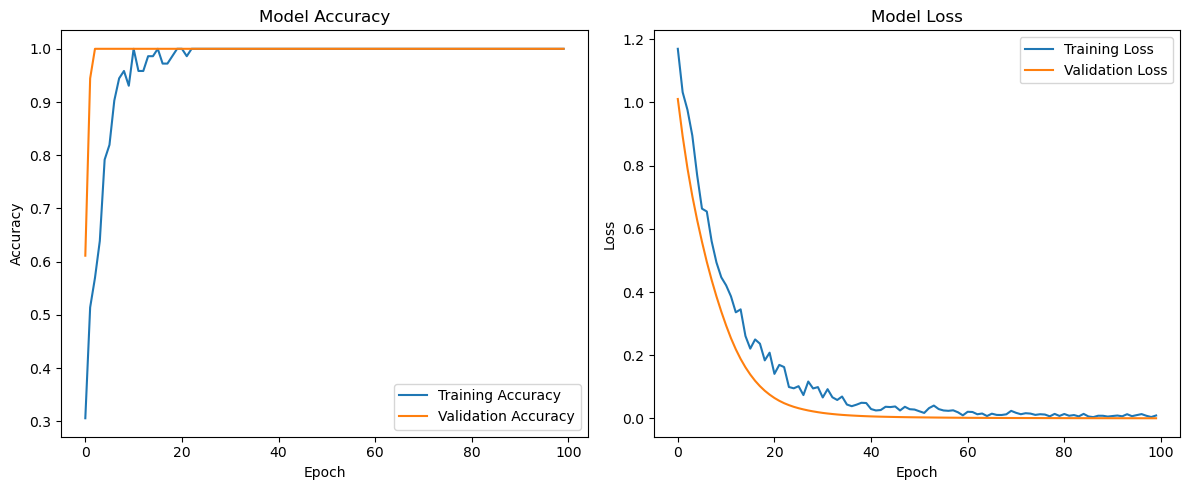

In [19]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy and loss
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='best')
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

In [15]:
# This is the function to preprocess input data and make predictions
def predict_tree_species(input_features):
    # Convert input features to a dataframe for easier processing
    input_df = pd.DataFrame([input_features], columns=features)

    # Scale the features
    input_scaled = scaler.transform(input_df)

    # Make predictions
    prediction = model.predict(input_scaled)
    predicted_class = np.argmax(prediction, axis=1)

    # Convert the predicted class back to the original label
    predicted_species = target_label_encoder.inverse_transform(predicted_class)
    return predicted_species[0]

In [20]:
# This function helps to get valid user input
def get_user_input(mean_std_data):
    while True:
        try:
            user_length = float(input("Enter the Length of the leaf: "))
            user_width = float(input("Enter the Width of the leaf: "))
            user_top_angle = float(input("Enter the top angle of the leaf: "))
            user_length_of_petiole = float(input("Enter the Length of the petiole of the leaf: "))

            if user_length <= 0 or user_width <= 0:
                raise ValueError("Length and Width must be positive numbers.")
            if user_length <= user_width:
                raise ValueError("Length must be greater than Width.")

            user_l_w = user_length / user_width
            user_input = [user_length, user_width, user_l_w, user_top_angle, user_length_of_petiole]
            
            # This Checks whether user input is within the acceptable range
            for i, feature in enumerate(features):
                mean, std = mean_std_data[feature]
                if not (mean - 3 * std <= user_input[i] <= mean + 3 * std):
                    raise ValueError(f"The value for {feature} is not within the acceptable range based on the dataset.")
            
            return user_input
        except ValueError as e:
            print(f"Invalid input: {e}. Please try again.")

In [21]:
# This code Calculate mean and standard deviation for each feature
mean_std_data = {feature: (data[feature].mean(), data[feature].std()) for feature in features}

# This code is to get user input
user_input = get_user_input(mean_std_data)

# Finally Making the prediction based on user input
predicted_species = predict_tree_species(user_input)
print(f'The predicted species is: {predicted_species}')

Enter the Length of the leaf: 9.5
Enter the Width of the leaf: 3.6
Enter the top angle of the leaf: 85
Enter the Length of the petiole of the leaf: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The predicted species is: Weliwenna


C:\Users\asus_pc\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
